<a href="https://colab.research.google.com/github/cavendano01/Statistical-Learning-II/blob/main/K-means-%26-GMM/K_means_y_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd # Data Manipulation
import numpy as np # Data computation
import matplotlib.pyplot as plt #Data visualization
from sklearn.mixture import GaussianMixture as GMM #GMM model
from sklearn.cluster import KMeans # Testing Sklearn
print ("Packages Loaded")

Packages Loaded


In [25]:
#Data Loading
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


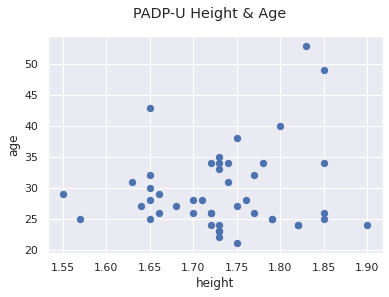

In [32]:
#Creating Heights Dataframe 
heights =pd.read_excel("/content/drive/MyDrive/Statistical-Learning-II/practica-1/estaturas.xlsx","normales")
X = heights.values
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');
plt.suptitle('PADP-U Height & Age')
plt.xlabel('height')
plt.ylabel('age')
plt.show()


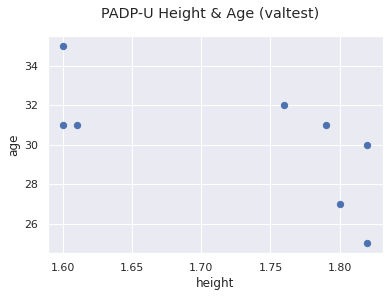

In [31]:
#Loading Validation Test Dataframe
#Creating Heights Dataset 
valtest =pd.read_excel("/content/drive/MyDrive/Statistical-Learning-II/practica-1/estaturas.xlsx","valtest(normales)")
Y = valtest.values
plt.scatter(Y[:, 0], Y[:, 1], s=40, cmap='viridis');
plt.suptitle('PADP-U Height & Age (valtest)')
plt.xlabel('height')
plt.ylabel('age')
plt.show()

# K-means

## Sklearn approach

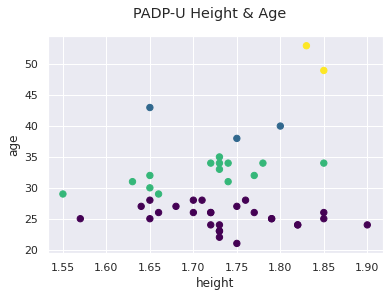

In [58]:
# Plot the data with K Means Labels
kmeans = KMeans(4, random_state=20,max_iter=100)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.suptitle('PADP-U Height & Age')
plt.xlabel('height')
plt.ylabel('age')
plt.show()

## K-means From Scratch
Creating a Class that contains functions for:
* Hard Clustering with sklearn
* Experiment logs 

In [38]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

13.844817828776607
0.9241154104478423
4.428606906205217
1.1439829696046977
2.7206563888945663


NameError: ignored

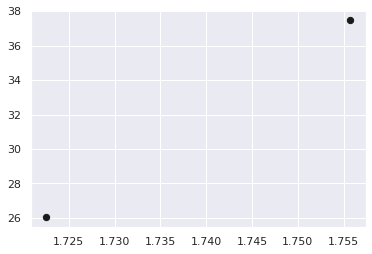

In [54]:
model = K_Means()
model.fit(X)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
               color="k", s=40,  cmap='viridis')
    #, s=40, cmap='viridis');


for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], s=40, cmap='viridis')

plt.suptitle('PADP-U Height & Age (valtest)')
plt.xlabel('height')
plt.ylabel('age')
plt.show()      

# GMM

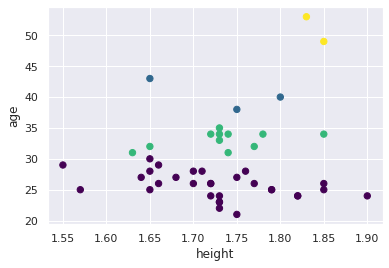

In [61]:
gmm = GMM(n_components=4,random_state=None,max_iter=100).fit(X)
labels = gmm.predict(X)
plt.xlabel('height')
plt.ylabel('age')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [13]:
#Means de los centroides 
print('means')
print(gmm.means_)
#print(gmm.covariances_)
print('std')
print(np.sqrt(gmm.covariances_))

means
[[ 1.70797373 26.39077418]
 [ 1.77666743 48.33324173]
 [ 1.72966228 33.28706989]
 [ 1.7775112  23.5637487 ]]
std
[[[0.07822381        nan]
  [       nan 1.62356671]]

 [[0.089943   0.56959416]
  [0.56959416 4.1097108 ]]

 [[0.05959421 0.32934493]
  [0.32934493 3.01358905]]

 [[0.05289564 0.21083731]
  [0.21083731 1.39124602]]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


# Model optimization (5 iterations) & Prediction 

## Model itereations

### Iteration 1
Results = 

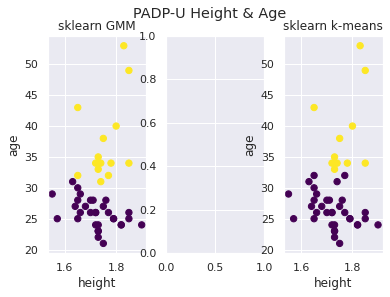

In [92]:
#Hyperparameters 
k = 2
epochs = 1000
random_seed = 10

#Model training 
kmeans1 = KMeans(k, random_state=random_seed,max_iter=epochs)
#k_means1 = 
gmm1 = GMM(n_components=k,random_state=random_seed,max_iter=epochs).fit(X)


#Ploting Results 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('PADP-U Height & Age')
label1 = gmm1.predict(X)
label2 = kmeans1.fit(X).predict(X)
#label3 =

# sklearn GMM
ax1.set_title('sklearn GMM')
ax1.set_xlabel('height')
ax1.set_ylabel('age')
ax1.scatter(X[:, 0], X[:, 1], c=label1, s=40, cmap='viridis');

# from scracth K-means

# sklearn k-means
ax3.set_title('sklearn k-means')
ax3.set_xlabel('height')
ax3.set_ylabel('age')
ax3.scatter(X[:, 0], X[:, 1], c=label2, s=40, cmap='viridis');

### Iteration 2
k = 3 epochs = 1000 random_seed = 10
Results = 

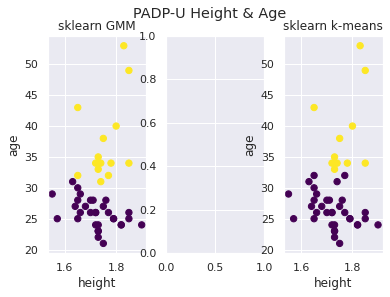

In [93]:
#Hyperparameters 
k = 3
epochs = 1000
random_seed = 10

#Model training 
kmeans2 = KMeans(k, random_state=random_seed,max_iter=epochs)
#k_means2 = 
gmm2 = GMM(n_components=k,random_state=random_seed,max_iter=epochs).fit(X)


#Ploting Results 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('PADP-U Height & Age')
label1 = gmm1.predict(X)
label2 = kmeans1.fit(X).predict(X)
#label3 =

# sklearn GMM
ax1.set_title('sklearn GMM')
ax1.set_xlabel('height')
ax1.set_ylabel('age')
ax1.scatter(X[:, 0], X[:, 1], c=label1, s=40, cmap='viridis');

# from scracth K-means

# sklearn k-means
ax3.set_title('sklearn k-means')
ax3.set_xlabel('height')
ax3.set_ylabel('age')
ax3.scatter(X[:, 0], X[:, 1], c=label2, s=40, cmap='viridis');

### Iteration 3
Results =

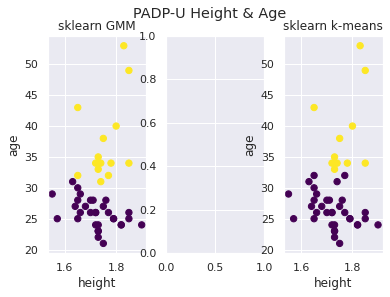

In [94]:
#Hyperparameters 
k = 4
epochs = 1000
random_seed = 10

#Model training 
kmeans3 = KMeans(k, random_state=random_seed,max_iter=epochs)
#k_means3 = 
gmm3 = GMM(n_components=k,random_state=random_seed,max_iter=epochs).fit(X)


#Ploting Results 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('PADP-U Height & Age')
label1 = gmm1.predict(X)
label2 = kmeans1.fit(X).predict(X)
#label3 =

# sklearn GMM
ax1.set_title('sklearn GMM')
ax1.set_xlabel('height')
ax1.set_ylabel('age')
ax1.scatter(X[:, 0], X[:, 1], c=label1, s=40, cmap='viridis');

# from scracth K-means

# sklearn k-means
ax3.set_title('sklearn k-means')
ax3.set_xlabel('height')
ax3.set_ylabel('age')
ax3.scatter(X[:, 0], X[:, 1], c=label2, s=40, cmap='viridis');

### Iteration 4
Volvemos a K= 3 ya que es más circular los resultados
Results =

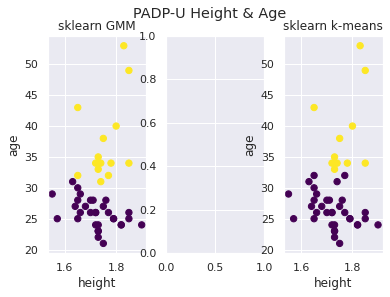

In [98]:
#Hyperparameters 
k = 3
epochs = 500
random_seed = 0

#Model training 
kmeans4 = KMeans(k, random_state=random_seed,max_iter=epochs)
#k_means4 = 
gmm4 = GMM(n_components=k,random_state=random_seed,max_iter=epochs).fit(X)


#Ploting Results 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('PADP-U Height & Age')
label1 = gmm1.predict(X)
label2 = kmeans1.fit(X).predict(X)
#label3 =

# sklearn GMM
ax1.set_title('sklearn GMM')
ax1.set_xlabel('height')
ax1.set_ylabel('age')
ax1.scatter(X[:, 0], X[:, 1], c=label1, s=40, cmap='viridis');

# from scracth K-means

# sklearn k-means
ax3.set_title('sklearn k-means')
ax3.set_xlabel('height')
ax3.set_ylabel('age')
ax3.scatter(X[:, 0], X[:, 1], c=label2, s=40, cmap='viridis');

### Iteration 5


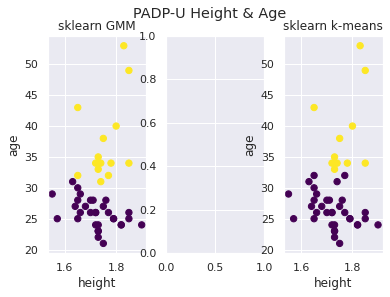

In [96]:
#Hyperparameters 
k = 3
epochs = 500
random_seed = 200

#Model training 
kmeans5 = KMeans(k, random_state=random_seed,max_iter=epochs)
#k_means5 = 
gmm5 = GMM(n_components=k,random_state=random_seed,max_iter=epochs).fit(X)


#Ploting Results 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('PADP-U Height & Age')
label1 = gmm1.predict(X)
label2 = kmeans1.fit(X).predict(X)
#label3 =

# sklearn GMM
ax1.set_title('sklearn GMM')
ax1.set_xlabel('height')
ax1.set_ylabel('age')
ax1.scatter(X[:, 0], X[:, 1], c=label1, s=40, cmap='viridis');

# from scracth K-means

# sklearn k-means
ax3.set_title('sklearn k-means')
ax3.set_xlabel('height')
ax3.set_ylabel('age')
ax3.scatter(X[:, 0], X[:, 1], c=label2, s=40, cmap='viridis');

## K-means prediction
### with K-means from Scratch

### With K-means from sklearn

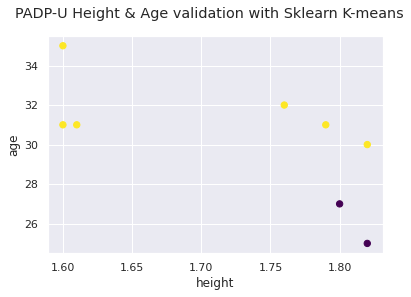

In [102]:

labels = kmeans4.fit(X).predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=labels, s=40, cmap='viridis');
plt.suptitle('PADP-U Height & Age validation with Sklearn K-means')
plt.xlabel('height')
plt.ylabel('age')
plt.show()

## GMM Prediction

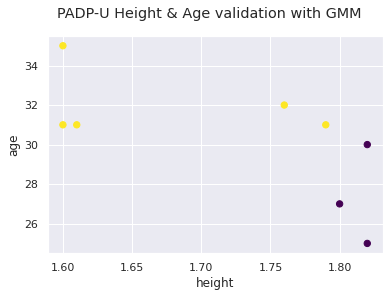

In [103]:
labels = gmm4.predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=labels, s=40, cmap='viridis');
plt.suptitle('PADP-U Height & Age validation with GMM')
plt.xlabel('height')
plt.ylabel('age')
plt.show()

In [104]:
gmm4.predict_proba(Y) 

array([[9.99992415e-01, 1.02546836e-36, 7.58509458e-06],
       [9.98461524e-01, 4.42003078e-29, 1.53847647e-03],
       [4.64402866e-01, 2.66373681e-07, 5.35596868e-01],
       [1.23393764e-02, 2.70463994e-02, 9.60614224e-01],
       [5.30902848e-01, 1.44381263e-22, 4.69097152e-01],
       [4.97945508e-03, 5.09227334e-15, 9.95020545e-01],
       [5.22175109e-02, 1.50538348e-18, 9.47782489e-01],
       [3.74740565e-01, 8.38139893e-08, 6.25259351e-01]])

# Montecarlo Estimations in 1000 simulated observations